In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import scipy.stats as ss

from collections import Counter
import math

# Работа с данными (к лаб. 1)

In [2]:
df = pd.read_csv("airline_train.csv").append(pd.read_csv("airline_test.csv"), ignore_index=True).drop_duplicates()

df = df.drop(['Unnamed: 0'], axis='columns')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,129880.0,64940.500000,37493.270818,1.0,32470.75,64940.5,97410.25,129880.0
Age,129880.0,39.427957,15.119360,7.0,27.00,40.0,51.00,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.00,844.0,1744.00,4983.0
Inflight wifi service,129880.0,2.728696,1.329340,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,129880.0,3.057599,1.526741,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,129880.0,2.756876,1.401740,0.0,2.00,3.0,4.00,5.0
Gate location,129880.0,2.976925,1.278520,0.0,2.00,3.0,4.00,5.0
Food and drink,129880.0,3.204774,1.329933,0.0,2.00,3.0,4.00,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.00,3.0,4.00,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.00,4.0,5.00,5.0


In [5]:
print(f"unique value columns: {[col for col in df.columns if df[col].nunique() <= 1]}")
total = df.isnull().sum().sort_values(ascending=False)
total

unique value columns: []


Arrival Delay in Minutes             393
satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
id                                     0
dtype: int64

In [6]:
df.loc[df['Arrival Delay in Minutes'].isnull()].index
df = df.drop(df.loc[df['Arrival Delay in Minutes'].isnull()].index)
df = df.sample(frac=0.1).reset_index()
total = df.isnull().sum().sort_values(ascending=False)
total

satisfaction                         0
Gate location                        0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Food and drink                       0
Arrival Delay in Minutes             0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
index                                0
dtype: int64

# Исследование данных

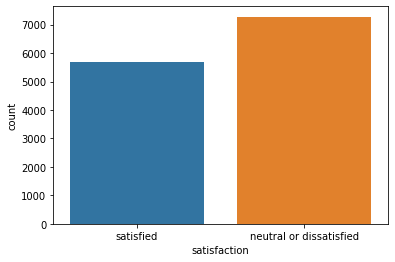

In [7]:
sns.countplot(x='satisfaction',data=df)

In [8]:
df_numerical = df.select_dtypes([np.number])
df_numerical = pd.concat([df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1}), df_numerical], axis=1)
df_numerical

,satisfaction,index,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,68991,108649,39,1747,1,1,1,1,2,...,5,5,5,5,5,3,5,4,34,36.0
1,1,115896,46853,35,844,3,3,3,3,3,...,3,3,1,3,3,5,4,3,10,1.0
2,1,103323,8657,48,3717,1,1,3,1,5,...,5,5,5,5,5,4,5,5,0,0.0
3,0,16587,3219,11,2323,1,0,0,4,1,...,1,1,3,1,3,2,4,1,0,3.0
4,1,60416,74893,52,2475,3,3,3,3,5,...,4,4,4,4,4,5,4,4,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12944,0,37178,88393,41,2284,3,4,4,4,3,...,2,3,3,3,3,1,3,3,0,0.0
12945,1,49901,111735,59,2171,4,4,4,4,2,...,5,5,5,5,5,4,5,4,10,5.0
12946,0,93131,59942,52,1068,2,3,3,3,2,...,2,2,1,4,3,4,3,2,0,0.0
12947,1,30664,57314,57,3380,5,5,5,5,2,...,4,5,5,5,5,5,5,5,0,0.0


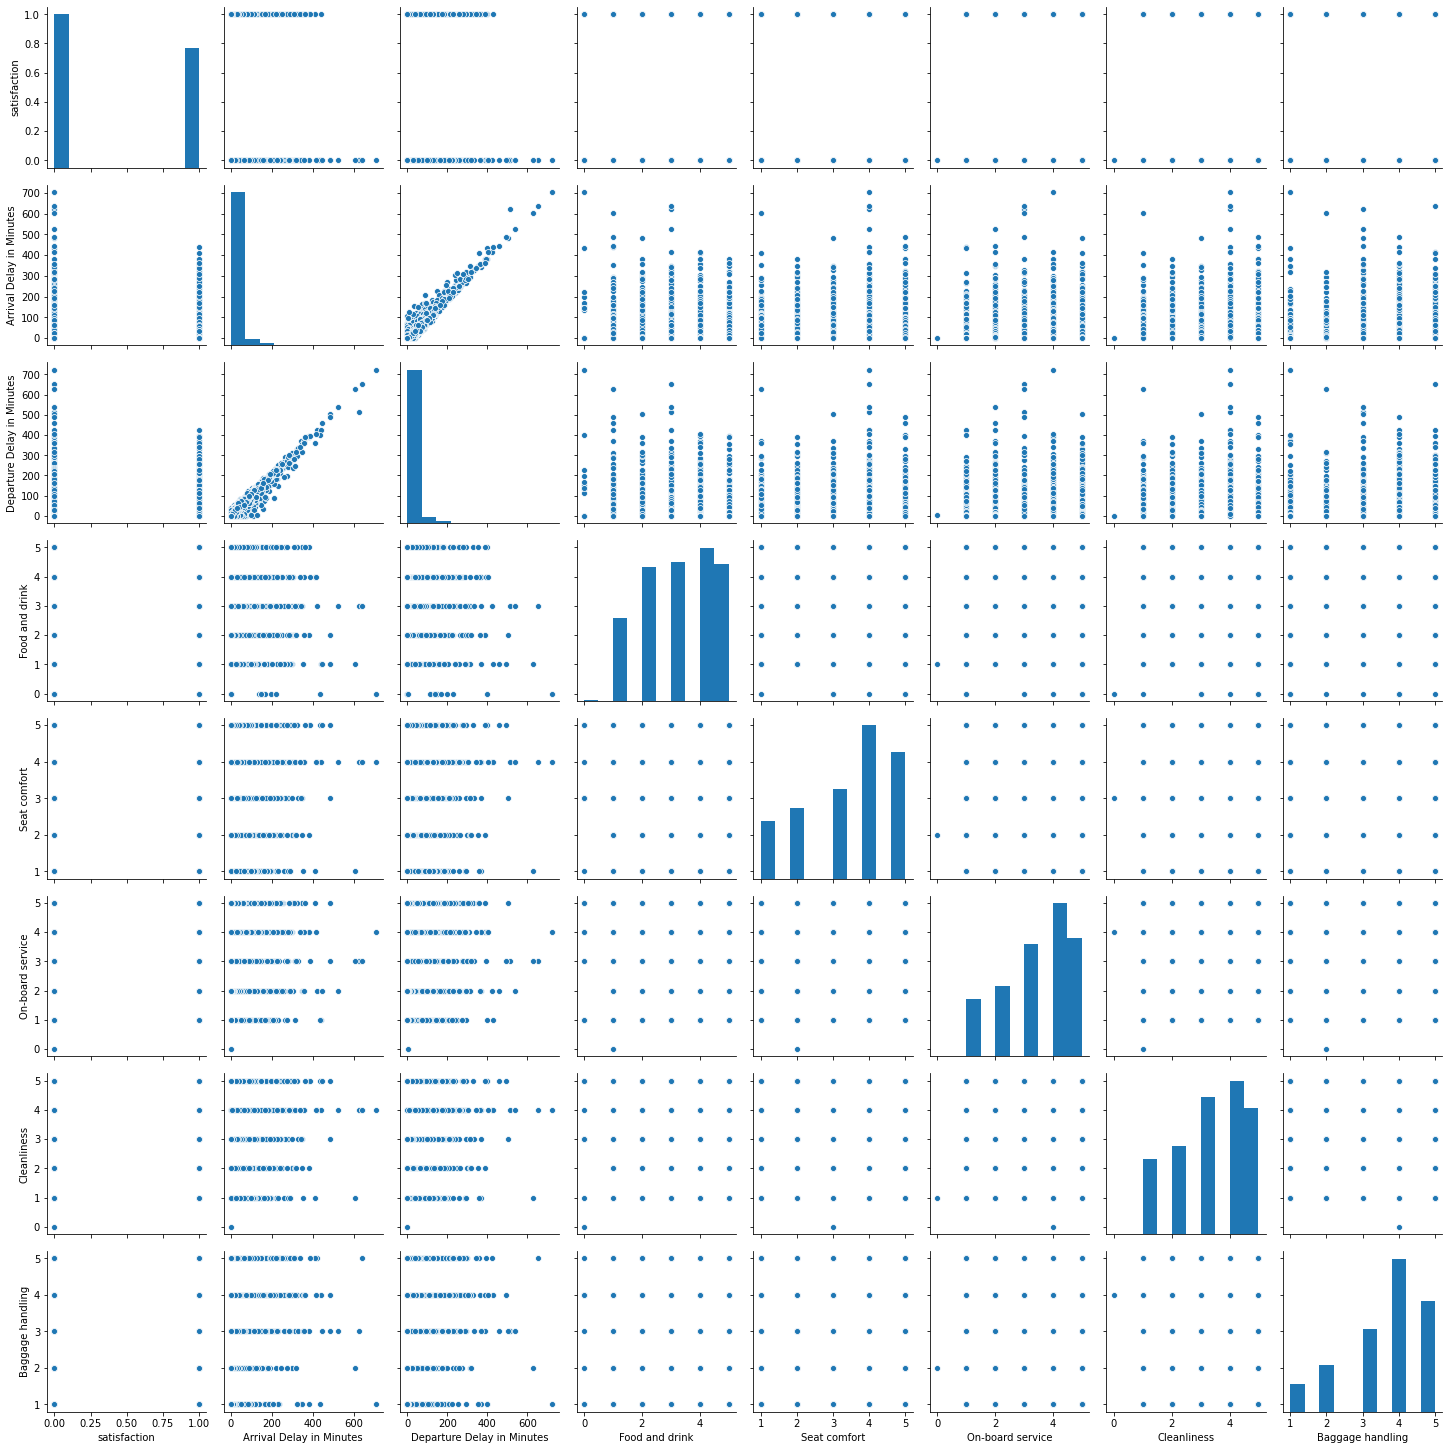

In [9]:
cols = ['satisfaction', 'Arrival Delay in Minutes', 'Departure Delay in Minutes', 'Food and drink',
       'Seat comfort', 'On-board service', 'Cleanliness',
       'Baggage handling']
sns.pairplot(df_numerical[cols])
plt.show()

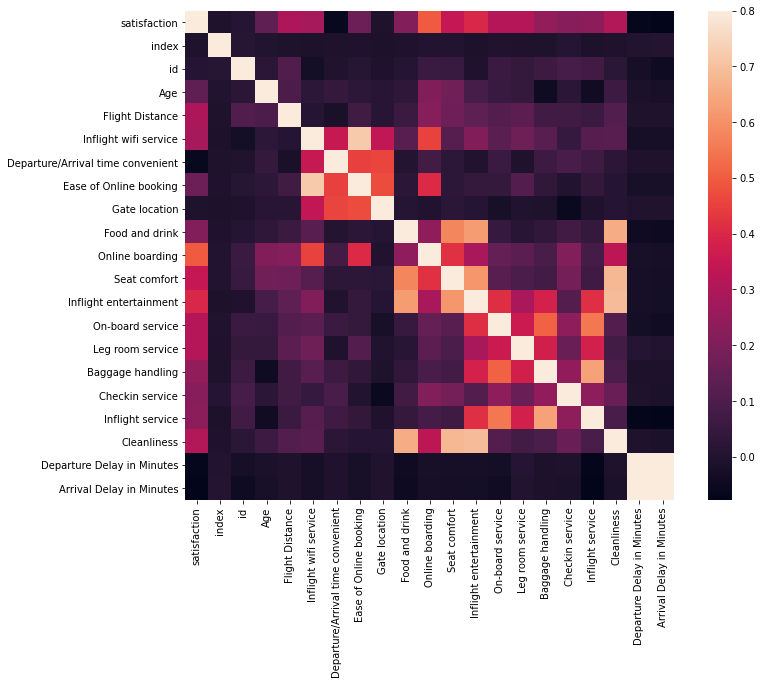

In [10]:
corr_mat = df_numerical.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_mat, vmax=0.8, square=True)

In [11]:
row = corr_mat.iloc[0].abs()
row.sort_values(axis='index', ascending=False).head()

satisfaction              1.000000
Online boarding           0.495990
Inflight entertainment    0.397133
Seat comfort              0.346780
Leg room service          0.312469
Name: satisfaction, dtype: float64

In [12]:
df_categorical = df.select_dtypes([object])
df_categorical = df_categorical[['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']]
df_categorical

,satisfaction,Gender,Customer Type,Type of Travel,Class
0,satisfied,Male,Loyal Customer,Business travel,Business
1,satisfied,Female,Loyal Customer,Business travel,Eco
2,satisfied,Male,Loyal Customer,Business travel,Business
3,neutral or dissatisfied,Male,Loyal Customer,Business travel,Business
4,satisfied,Female,Loyal Customer,Business travel,Business
...,...,...,...,...,...
12944,neutral or dissatisfied,Male,Loyal Customer,Business travel,Business
12945,satisfied,Female,Loyal Customer,Business travel,Business
12946,neutral or dissatisfied,Male,Loyal Customer,Business travel,Eco
12947,satisfied,Male,Loyal Customer,Business travel,Business


In [13]:
# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
# https://stackoverflow.com/questions/54931514/theils-u-1-theils-u-2-forecast-coefficient-formula-in-python
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

def apply(df, f):
    n = df.shape[1]
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            mat[i][j] = f(df[df.columns[i]], df[df.columns[j]])
    ndf = pd.DataFrame(mat, index=df.columns, columns=df.columns)
    return ndf

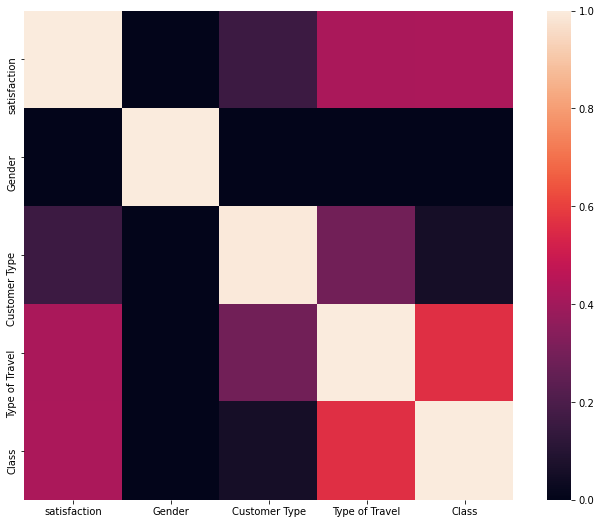

In [14]:
cramers_v_mat = apply(df_categorical[:df.shape[0] // 16], cramers_v)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cramers_v_mat, vmax=1.0, square=True);

In [15]:
row = cramers_v_mat.iloc[0]
row.sort_values(axis='index', ascending=False).head()

satisfaction      0.997486
Class             0.422639
Type of Travel    0.420171
Customer Type     0.158663
Gender            0.000000
Name: satisfaction, dtype: float64

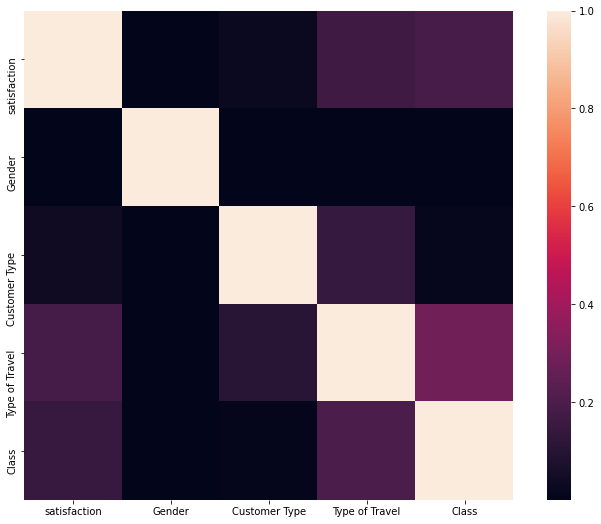

In [16]:
theils_u_mat = apply(df_categorical, theils_u)

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(theils_u_mat, vmax=1.0, square=True);

In [17]:
row = theils_u_mat.iloc[0].abs()
row.sort_values(axis='index', ascending=False).head()

satisfaction      1.000000
Class             0.191104
Type of Travel    0.164778
Customer Type     0.028599
Gender            0.000027
Name: satisfaction, dtype: float64

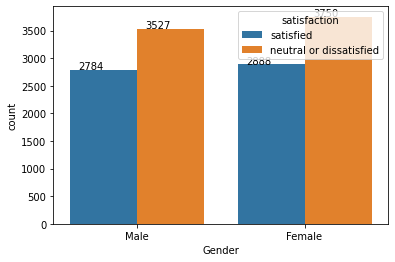

In [18]:
plt.subplot()
ax=sns.countplot(x='Gender',hue='satisfaction',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

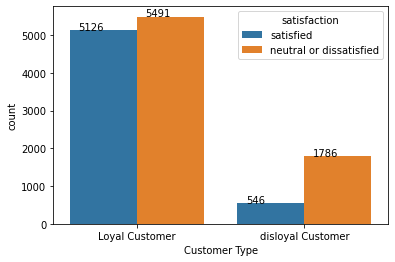

In [19]:
plt.subplot()
ax=sns.countplot(x='Customer Type',hue='satisfaction',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

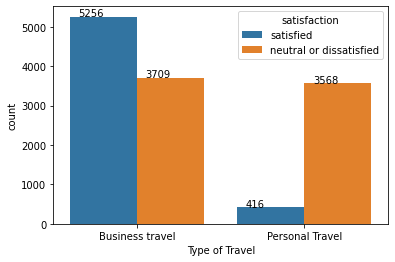

In [20]:
plt.subplot()
ax=sns.countplot(x='Type of Travel',hue='satisfaction',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

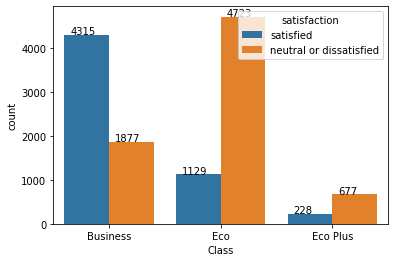

In [21]:
plt.subplot()
ax=sns.countplot(x='Class',hue='satisfaction',data=df)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.05, patch_height+10))
plt.show()

Т.о. наиболее информатиыными признаками будут:
    'Class', 'Type of Travel' -- категориальные, 'Class', 'Type of Travel' -- числовые

# Обучение моделей (к лаб. 2)

In [22]:
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [23]:
numerical_col = ['Online boarding', 'Inflight entertainment' ,'Seat comfort', 'On-board service']
categorical_col = ['Class', 'Type of Travel']

scaler = preprocessing.StandardScaler().fit(df[numerical_col])

t = scaler.transform(df[numerical_col])

y = df['satisfaction'].map({'neutral or dissatisfied' : 0, 'satisfied' : 1})
categorical_X = pd.get_dummies(df[categorical_col])
numerical_X = pd.DataFrame(t, columns=numerical_col)

X = categorical_X.join(numerical_X)
X

,Class_Business,Class_Eco,Class_Eco Plus,Type of Travel_Business travel,Type of Travel_Personal Travel,Online boarding,Inflight entertainment,Seat comfort,On-board service
0,1,0,0,1,0,-0.180564,1.227008,1.182225,1.245915
1,0,1,0,1,0,-0.180564,-0.263753,-0.335886,-1.864579
2,1,0,0,1,0,0.557246,1.227008,1.182225,1.245915
3,1,0,0,1,0,-2.393992,-1.754514,-1.853997,-0.309332
4,1,0,0,1,0,0.557246,0.481628,0.423170,0.468292
...,...,...,...,...,...,...,...,...,...
12944,1,0,0,1,0,-0.918373,-0.263753,-1.094942,-0.309332
12945,1,0,0,1,0,1.295055,1.227008,1.182225,1.245915
12946,0,1,0,1,0,-0.918373,-1.009133,-1.094942,-1.864579
12947,1,0,0,1,0,1.295055,1.227008,0.423170,1.245915


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import models

In [25]:
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import precision_score, recall_score, accuracy_score

def print_metrics(clf, X, y, k_folds=5, average='macro'):
    kf = StratifiedKFold(n_splits=k_folds, random_state=123, shuffle=True)
    precision = np.zeros(k_folds)   
    recall = np.zeros(k_folds)  
    test_accuracy = np.zeros(k_folds)
    train_accuracy = np.zeros(k_folds)
    
    for i, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, y_train = X.loc[train_index].to_numpy(), y.loc[train_index].to_numpy()
        X_val, y_val = X.loc[val_index].to_numpy(), y.loc[val_index].to_numpy()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)
        y_train_pred = clf.predict(X_train)
        
        precision[i] = precision_score(y_val, y_pred, average=average)
        recall[i] = recall_score(y_val, y_pred, average=average)
        
        train_accuracy[i] = accuracy_score(y_train, y_train_pred)
        test_accuracy[i] = accuracy_score(y_val, y_pred)
        
    print(f'precision: {precision.mean()}')
    print(f'recall: {recall.mean()}')
    print()
    print(f'train_accuracy: {train_accuracy.mean()}')
    print(f'test_accuracy: {test_accuracy.mean()}')    

# Логистическая регрессия

In [26]:
%%time
LR = models.LogisticRegression()

print_metrics(LR, X, y)

precision: 0.8339153546688145
recall: 0.8328309637668221

train_accuracy: 0.8359332604293508
test_accuracy: 0.8361259620819297
CPU times: user 10.9 s, sys: 18.8 s, total: 29.7 s
Wall time: 6.86 s


In [27]:
%%time
sLR = LogisticRegression(random_state=0)

print_metrics(sLR, X, y)

precision: 0.8377238801930929
recall: 0.8371028126853778

train_accuracy: 0.8401034632746187
test_accuracy: 0.8399873536837615
CPU times: user 978 ms, sys: 1.84 s, total: 2.82 s
Wall time: 675 ms


# KNN

In [28]:
%%time
KNN = models.KNN(n_neighbors=3)

print_metrics(KNN, X, y)

precision: 0.8700839386748225
recall: 0.8664121332272892

train_accuracy: 0.8961309379380623
test_accuracy: 0.8704147484680508
CPU times: user 1min 20s, sys: 158 ms, total: 1min 20s
Wall time: 1min 20s


In [29]:
%%time
sKNN = KNeighborsClassifier(n_neighbors=3)

print_metrics(sKNN, X, y)

precision: 0.8747503828073245
recall: 0.8696140063595253

train_accuracy: 0.8969225909538681
test_accuracy: 0.8744304609194528
CPU times: user 5.79 s, sys: 12.2 ms, total: 5.8 s
Wall time: 5.79 s


# Решающее дерево

In [30]:
%%time
DTC = models.DecisionTree(max_depth=4)

print_metrics(DTC, X, y)

precision: 0.8686758147495329
recall: 0.8587024040435866

train_accuracy: 0.8665147721880997
test_accuracy: 0.8658581077352803
CPU times: user 25.2 s, sys: 8.48 ms, total: 25.2 s
Wall time: 25.2 s


In [31]:
%%time
sDTC = DecisionTreeClassifier(max_depth=4)

print_metrics(sDTC, X, y)

precision: 0.8686758147495329
recall: 0.8587024040435866

train_accuracy: 0.8665147721880997
test_accuracy: 0.8658581077352803
CPU times: user 116 ms, sys: 185 µs, total: 116 ms
Wall time: 115 ms


# Случайный лес

In [32]:
%%time
RFC = models.RandomForest(max_depth=4, n_estimators=25)

print_metrics(RFC, X, y)

precision: 0.8533138547735873
recall: 0.8305532190708819

train_accuracy: 0.8425942785282491
test_accuracy: 0.8426121801324582
CPU times: user 3min 33s, sys: 142 ms, total: 3min 33s
Wall time: 3min 34s


In [35]:
%%time
sRFC = RandomForestClassifier(max_depth=4, n_estimators=25, random_state=0)

print_metrics(sRFC, X, y)

precision: 0.8652839350189016
recall: 0.8631301357215151

train_accuracy: 0.8664376173368353
test_accuracy: 0.8665530586040434
CPU times: user 756 ms, sys: 51 µs, total: 756 ms
Wall time: 755 ms


Видно, что достигается неплохое качество классификации, при этом не происходит переобучения моделей.